In [1]:
# 📊 Day 2: Exploratory Data Analysis (EDA) with Pandas
# Author: David Caleb Chaparro Orozco
# Topic: Netflix Viewing Data

# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_utils import (plot_histogram, plot_bar, plot_boxplot, 
                        plot_scatter, save_combined_plots)

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
# Load the dataset
data_movies = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-29/movies.csv")
# Display top rows of the dataset
data_movies.head()

,source,report,title,available_globally,release_date,hours_viewed,runtime,views
0,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Back in Action,Yes,2025-01-17,313000000.0,1H 54M 0S,164700000.0
1,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,STRAW,Yes,2025-06-06,185200000.0,1H 48M 0S,102900000.0
2,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,The Life List,Yes,2025-03-28,198900000.0,2H 5M 0S,95500000.0
3,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Exterritorial,Yes,2025-04-30,159000000.0,1H 49M 0S,87500000.0
4,1_What_We_Watched_A_Netflix_Engagement_Report_...,2025Jan-Jun,Havoc,Yes,2025-04-25,154900000.0,1H 47M 0S,86900000.0


In [3]:
# Display tail rows of the dataset
data_movies.tail()

,source,report,title,available_globally,release_date,hours_viewed,runtime,views
36116,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,الرجل الرابع,No,NaN,100000.0,1H 32M 0S,100000.0
36117,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,두근두근 내 인생,No,NaN,100000.0,1H 52M 0S,100000.0
36118,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,라디오 스타,No,NaN,100000.0,1H 56M 0S,100000.0
36119,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,선생 김봉두,No,NaN,100000.0,1H 57M 0S,100000.0
36120,4_What_We_Watched_A_Netflix_Engagement_Report_...,2023Jul-Dec,표적,No,NaN,100000.0,1H 38M 0S,100000.0


In [4]:
# Display the types of each column
data_movies.dtypes

source                 object
report                 object
title                  object
available_globally     object
release_date           object
hours_viewed          float64
runtime                object
views                 float64
dtype: object

In [5]:
# Check a overview of the dataset
def overview(data):
    print("=".center(50,"="))
    # Print the shape of the dataset to see how many rows and columns it has.
    print(f"\nMovie viewing data from Netflix. Overview")
    print(f"Shape: {data.shape}")
    print("=".center(50,"="))

    # Display Index, Columns, and Data Types
    print("Information about the features:")
    print(data.info())
    print("=".center(50,"="))

    # Display summary statistics
    print("Basic statistics check:")
    print(data.describe())
    print("=".center(50,"="))

    # I always run this part to understand the unique values in each column.
    # It helps me get a sense of the data, especially which features are categorical or have low variability.
    print("Checking the number of unique values:")
    unique_counts = {}
    for column in data.columns:
        unique_counts[column] = data[column].nunique()
    unique_data = pd.DataFrame(unique_counts, index=["Unique Count"]).transpose()
    print(unique_data)
    print("=".center(50, "="))

    # Check for Missing Values
    print("Check for missing values:")
    print(data.isnull().sum())
overview(data_movies)


Movie viewing data from Netflix. Overview
Shape: (36121, 8)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36121 entries, 0 to 36120
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   source              36121 non-null  object 
 1   report              36121 non-null  object 
 2   title               36115 non-null  object 
 3   available_globally  36112 non-null  object 
 4   release_date        6725 non-null   object 
 5   hours_viewed        36109 non-null  float64
 6   runtime             36109 non-null  object 
 7   views               36109 non-null  float64
dtypes: float64(2), object(6)
memory usage: 2.2+ MB
None
Basic statistics check:
       hours_viewed         views
count  3.610900e+04  3.610900e+04
mean   2.790858e+06  1.573256e+06
std    9.054284e+06  4.974895e+06
min    1.000000e+05  1.000000e+05
25%    2.000000e+05  1.000000e+05
50%    4.000000e+05  3.0

# 📊 Dataset Overview: Netflix Viewing Data

Now let's review the output that the `overview` function returned to us — step by step.

---

## 1. 📐 Dataset Shape

```python
Shape: (36121, 8)
````

* The dataset contains **36,121 rows** and **8 columns**.
* Each row represents a movie or show's viewing data.
* This is useful to get a quick idea of the dataset’s size before doing deeper analysis.

---

## 2. 🧾 Information About the Features

```python
Data columns (total 8 columns):
 0   source              36121 non-null  object 
 1   report              36121 non-null  object 
 2   title               36115 non-null  object 
 3   available_globally  36112 non-null  object 
 4   release_date         6725 non-null  object 
 5   hours_viewed        36109 non-null  float64
 6   runtime             36109 non-null  object 
 7   views               36109 non-null  float64
```

* **Non-null counts** show how complete each column is.
* **Data types** help us understand how each feature is stored (e.g., object vs. float).
* Columns like `release_date` have a lot of missing values and may need special attention during cleaning.

---

## 3. 📈 Basic Statistics

```text
       hours_viewed         views
count  36109.0         36109.0
mean   2,790,858.0     1,573,256.0
std    9,054,284.0     4,974,895.0
min    100,000.0       100,000.0
25%    200,000.0       100,000.0
50%    400,000.0       300,000.0
75%    1,900,000.0     1,100,000.0
max    313,000,000.0   164,700,000.0
```

* **`hours_viewed` and `views`** show a high spread (std > mean), which suggests outliers.
* Median values (50%) are much lower than the max values, reinforcing that skew.
* Good place to consider visualization later (e.g., boxplots or histograms).

---

## 4. 🔍 Unique Values per Column

```text
                    Unique Count
source                         4
report                         4
title                      13551
available_globally             3
release_date                1128
hours_viewed                 618
runtime                      212
views                        434
```

* Useful to identify **categorical columns** (e.g., `source`, `report`, `available_globally`).
* Columns like `title` and `release_date` have high cardinality.
* Helps decide which features may need encoding or grouping.

---

## 5. ❗ Missing Values

```text
source                    0
report                    0
title                     6
available_globally        9
release_date          29396
hours_viewed             12
runtime                  12
views                    12
```

* The column `release_date` has **many missing values** (over 80%).
* A few missing values in `views`, `runtime`, and `hours_viewed` can likely be filled or dropped.
* Useful for planning the data cleaning step.

---

### ✅ Summary

The `overview` function provides a solid first look at the dataset:

* We understand its **size**, **structure**, **statistics**, **uniqueness**, and **missing data**.
* It's a great starting point before deeper steps like visualization, feature engineering, or modeling.

---

## 🔤 Glossary of Terms

- **Outliers**: Data points that are much higher or lower than the rest of the data; they can skew statistical measures.
- **Cardinality**: The number of unique values in a column. High cardinality means many different values.
- **Non-null**: A data entry that is not missing; it contains some valid value.
- **Skewed distribution**: When the data is not symmetrically distributed (e.g., more values on one side).
- **Categorical variable**: A column that contains labels or categories (e.g., "Yes", "No", "Drama", "Action").
- **Standard deviation**: A measure of how spread out the numbers are from the mean.

---

# Data Cleaning
Useful tools to detect and clean issues

In [6]:
def data_cleaning(data):

    # Make a copy of the original data to preserve it
    data_cleaned = data.copy()

    print("=".center(50, "="))
    print("Data Cleaning Overview")
    # Drop missing values
    print("Original data:")
    print(data_cleaned.head())
    print("=".center(50, "="))

    # Drop missing values
    print("Dropping missing values")
    data_cleaned = data_cleaned.dropna()
    print("After dropping missing values:")
    print(data_cleaned.head())
    print("=".center(50, "="))

    # Fill remaining missing values with a constant
    print("Filling any remaining missing values with 'Unknown'")
    data_cleaned = data_cleaned.fillna("Unknown")
    print("After filling missing values:")
    print(data_cleaned.head())
    print("=".center(50, "="))

    # Drop unnecessary columns
    print("Dropping unnecessary columns (runtime)")
    data_cleaned = data_cleaned.drop(columns=["runtime"])
    print("After dropping 'runtime' column:")
    print(data_cleaned.head())
    print("=".center(50, "="))

    # Rename columns for clarity
    print("Renaming columns for clarity")
    data_cleaned = data_cleaned.rename(columns={"title": "movie_title"})
    print("After renaming 'title' to 'movie_title':")
    print(data_cleaned.head())
    print("=".center(50, "="))

    return data_cleaned

cleaned_data = data_cleaning(data_movies)

Data Cleaning Overview
Original data:
                                              source       report  \
0  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   
1  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   
2  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   
3  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   
4  1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   

            title available_globally release_date  hours_viewed    runtime  \
0  Back in Action                Yes   2025-01-17   313000000.0  1H 54M 0S   
1           STRAW                Yes   2025-06-06   185200000.0  1H 48M 0S   
2   The Life List                Yes   2025-03-28   198900000.0   2H 5M 0S   
3   Exterritorial                Yes   2025-04-30   159000000.0  1H 49M 0S   
4           Havoc                Yes   2025-04-25   154900000.0  1H 47M 0S   

         views  
0  164700000.0  
1  102900000.0  
2   95500000.0  
3   875000

# 🧹 Data Cleaning: Netflix Viewing Data

Now let's walk through what the `data_cleaning` function does — step by step.

---

## 🔧 What does this function do?

The `data_cleaning()` function prepares the raw dataset for analysis by:

* Removing missing or incomplete rows.
* Filling any remaining missing values.
* Dropping unnecessary columns.
* Renaming columns to improve clarity.

---

## 1. 📄 Original Dataset Preview

Before cleaning, here's a preview of the dataset:

```text
Columns: source, report, title, available_globally, release_date, hours_viewed, runtime, views
```

* Some rows contain **missing values**, especially in `release_date`.
* Column `runtime` is in text format and might not be useful for modeling.
* We keep a copy of the dataset to avoid modifying the original.

---

## 2. ❌ Dropping Missing Values

```python
data_cleaned = data_cleaned.dropna()
```

* This step removes **all rows** that have at least one missing value.
* It's a **hard cleaning step**, so we do it early to simplify downstream work.
* ⚠️ Be cautious: this can significantly reduce the dataset size.

---

## 3. 🧯 Filling Remaining Missing Values

```python
data_cleaned = data_cleaned.fillna("Unknown")
```

* In case any missing values remain after dropping rows, we fill them with `"Unknown"`.
* This is useful for **categorical columns** or when we want to avoid nulls entirely.

---

## 4. ✂️ Dropping Unnecessary Columns

```python
data_cleaned = data_cleaned.drop(columns=["runtime"])
```

* We remove the `runtime` column, which is **non-numeric** and **inconsistent**.
* If needed later, we could process it separately and re-integrate it.

---

## 5. 🏷 Renaming Columns

```python
data_cleaned = data_cleaned.rename(columns={"title": "movie_title"})
```

* This makes the column name **more descriptive and readable**, especially in plots or joins.
* A small but useful change for clarity and better code readability.

---

## ✅ Final Output Preview

After all cleaning steps, each row in the dataset:

* Has **no missing values**
* No longer includes `runtime`
* Uses `movie_title` instead of `title`

```text
Columns: source, report, movie_title, available_globally, release_date, hours_viewed, views
```

---

## 📌 Summary

The `data_cleaning` function does a complete basic cleaning:

| Step                        | Purpose                            |
| --------------------------- | ---------------------------------- |
| `dropna()`                  | Remove incomplete rows             |
| `fillna("Unknown")`         | Ensure no missing values remain    |
| `drop(columns=["runtime"])` | Remove irrelevant/unusable column  |
| `rename(columns={...})`     | Make column names more informative |

It leaves us with a **clean, usable, and consistent dataset** — ready for EDA, visualization, or modeling.

---

## 🔤 Glossary of Cleaning Terms

* **Missing value (null)**: A cell in the dataset that has no data (`NaN`, `None`, etc.)
* **Drop**: Permanently remove rows or columns from a DataFrame.
* **Imputation**: Replacing missing values with a default value (e.g., mean, "Unknown").
* **Column renaming**: Giving clearer, more descriptive names to fields for readability.
* **Data cleaning**: The process of preparing raw data by fixing or removing incorrect, incomplete, or irrelevant parts.

---

In [7]:
# Perform a step-by-step transformation to explore and prepare the data
def data_transformation(data):
    print("=".center(50, "="))
    print("Data Transformation Overview")
    print("=".center(50, "="))

    # Create a copy of the dataset to preserve the original
    transformed_data = data.copy()

    # Create a new column with hours viewed in millions
    print("Creating new feature: 'hours_viewed_million'")
    transformed_data["hours_viewed_million"] = transformed_data["hours_viewed"].apply(lambda x: x / 1e6)
    print(transformed_data[["hours_viewed", "hours_viewed_million"]].head())
    print("=".center(50, "="))

    # Group total views by report period
    print("Aggregating total views by report period:")
    views_by_report = transformed_data.groupby("report")["views"].sum().reset_index()
    print(views_by_report)
    print("=".center(50, "="))

    # Pivot table: average views based on global availability
    print("Pivot table: Average views by global availability:")
    average_views_by_availability = transformed_data.pivot_table(
        index="available_globally",
        values="views",
        aggfunc="mean"
    )
    print(average_views_by_availability)
    print("=".center(50, "="))

    # Combine first and last records to preview structure
    print("Preview of combined first 2 and last 2 records:")
    preview_combined = pd.concat([transformed_data.head(2), transformed_data.tail(2)])
    print(preview_combined)
    print("=".center(50, "="))

    return transformed_data

transformed_data = data_transformation(data_movies)


Data Transformation Overview
Creating new feature: 'hours_viewed_million'
   hours_viewed  hours_viewed_million
0   313000000.0                 313.0
1   185200000.0                 185.2
2   198900000.0                 198.9
3   159000000.0                 159.0
4   154900000.0                 154.9
Aggregating total views by report period:
        report         views
0  2023Jul-Dec  1.428240e+10
1  2024Jan-Jun  1.448920e+10
2  2024Jul-Dec  1.457520e+10
3  2025Jan-Jun  1.346190e+10
Pivot table: Average views by global availability:
                           views
available_globally              
No                  1.196744e+06
Yes                 3.174556e+06
Preview of combined first 2 and last 2 records:
                                                  source       report  \
0      1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   
1      1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   
36119  4_What_We_Watched_A_Netflix_Engagement_Report_...  202

# 🔄 Data Transformation: Netflix Viewing Dataset

This section walks through the output of the `data_transformation()` function, which helps us **enhance and summarize** the dataset for better understanding and further analysis.

---

## 1. 📏 Creating New Feature: `hours_viewed_million`

```text
   hours_viewed  hours_viewed_million
0   313000000.0                 313.0
1   185200000.0                 185.2
2   198900000.0                 198.9
3   159000000.0                 159.0
4   154900000.0                 154.9
```

* A new column, `hours_viewed_million`, was added by converting raw values into **millions of hours**.
* This simplifies comparisons and visualization, making large numbers easier to interpret.
* Example: 313,000,000 hours → **313.0 million**.

---

## 2. 📊 Aggregating Total Views by Report Period

```text
        report         views
0  2023Jul-Dec  1.428240e+10
1  2024Jan-Jun  1.448920e+10
2  2024Jul-Dec  1.457520e+10
3  2025Jan-Jun  1.346190e+10
```

* Views were **summed across different reporting periods**, helping to see how total engagement changes over time.
* This is useful for trend analysis at the **report-level granularity** (e.g., half-yearly).
* The 2024 periods had the highest total views.

---

## 3. 🌍 Pivot Table: Average Views by Global Availability

```text
                           views
available_globally              
No                  1.196744e+06
Yes                 3.174556e+06
```

* A pivot table was created to calculate the **average number of views** based on whether content was available globally.
* Results show:

  * **Globally available content** had significantly higher average views (\~3.17M).
  * **Non-global releases** had lower average views (\~1.19M).
* Suggests that broader availability drives more engagement.

---

## 4. 🔍 Preview of First and Last Rows

```text
                                                  source       report  \
0      1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   
1      1_What_We_Watched_A_Netflix_Engagement_Report_...  2025Jan-Jun   
36119  4_What_We_Watched_A_Netflix_Engagement_Report_...  2023Jul-Dec   
36120  4_What_We_Watched_A_Netflix_Engagement_Report_...  2023Jul-Dec   

                title available_globally release_date  hours_viewed  \
0      Back in Action                Yes   2025-01-17   313000000.0   
1               STRAW                Yes   2025-06-06   185200000.0   
36119          선생 김봉두                 No          NaN      100000.0   
36120              표적                 No          NaN      100000.0   

         runtime        views  hours_viewed_million  
0      1H 54M 0S  164700000.0                 313.0  
1      1H 48M 0S  102900000.0                 185.2  
36119  1H 57M 0S     100000.0                   0.1  
36120  1H 38M 0S     100000.0                   0.1  
```

* This step simply concatenates the first and last 2 rows to give a **broad snapshot** of the dataset's structure and content range.
* Useful for validating data order, consistency, and any edge cases (e.g., missing values, special characters, non-English titles).

---

## ✅ Summary

The `data_transformation()` function introduces **practical enhancements and insights** into the dataset:

* It simplifies large numeric values for better readability.
* Aggregates and summarizes engagement across time and categories.
* Offers a quick preview of structure, coverage, and boundary cases.

These steps are foundational for building **visualizations, dashboards**, or **preprocessing for modeling**.

---

## 🧠 Glossary of Terms

* **Pivot Table**: A summary table that allows you to reorganize and aggregate data by categories.
* **Aggregation**: Combining multiple values (e.g., sum, mean) to summarize data.
* **Feature Engineering**: Creating new features from existing data to improve insights or model performance.
* **Global Availability**: Indicates whether a title is released worldwide or in limited regions.
* **Report Period**: Time intervals (e.g., 2024Jan-Jun) used to group and analyze performance over time.

---

# Plots

In [8]:
cleaned_data.columns

Index(['source', 'report', 'movie_title', 'available_globally', 'release_date',
       'hours_viewed', 'views'],
      dtype='object')

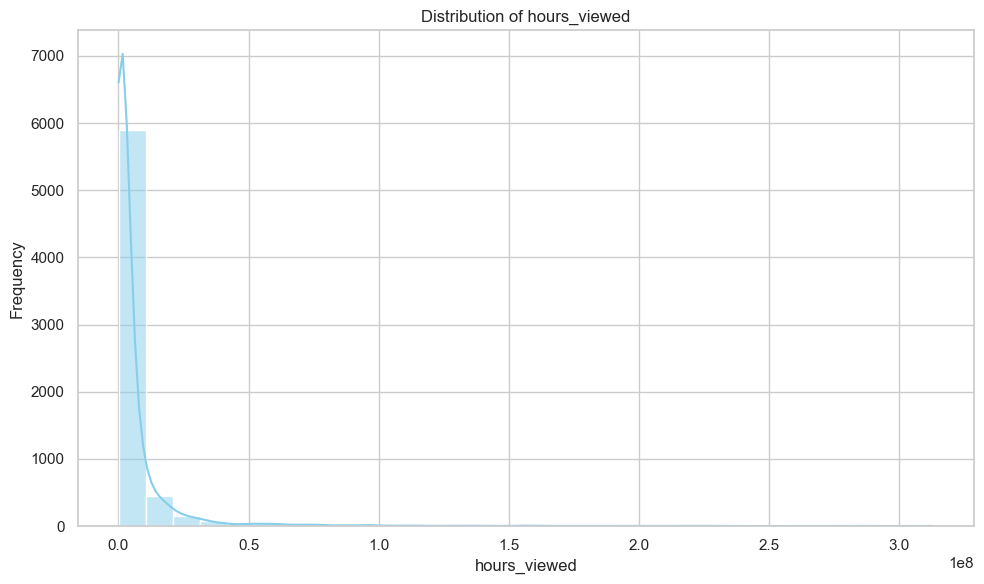

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day2_Pandas_EDA\pandas_utils.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, palette=color_palette)


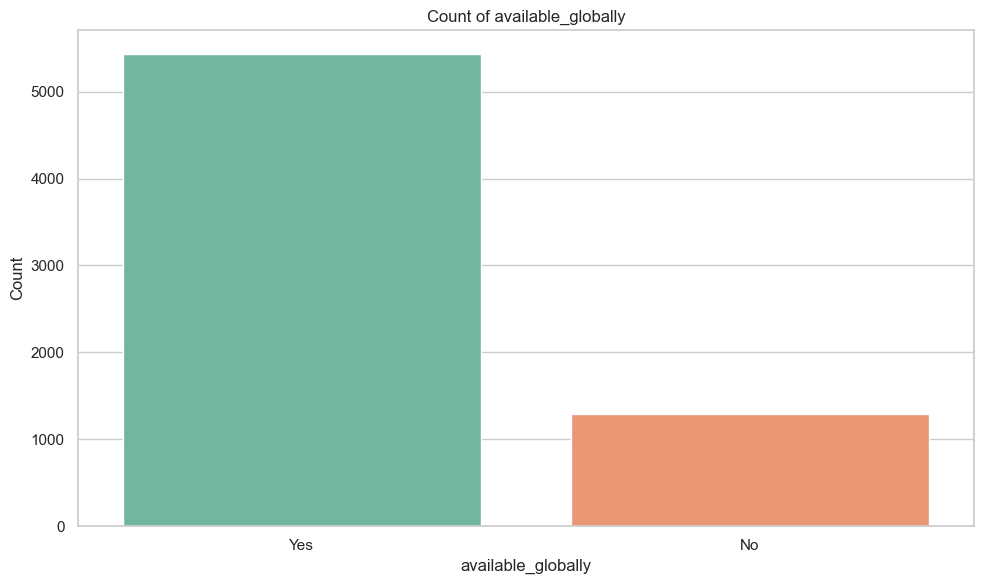

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day2_Pandas_EDA\pandas_utils.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x_column, y=y_column, palette=color_palette)


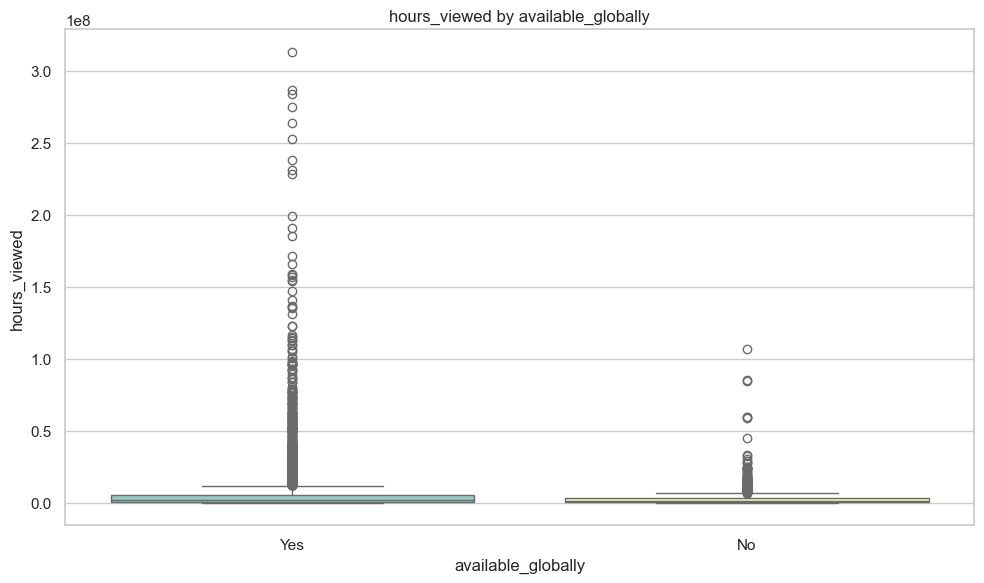

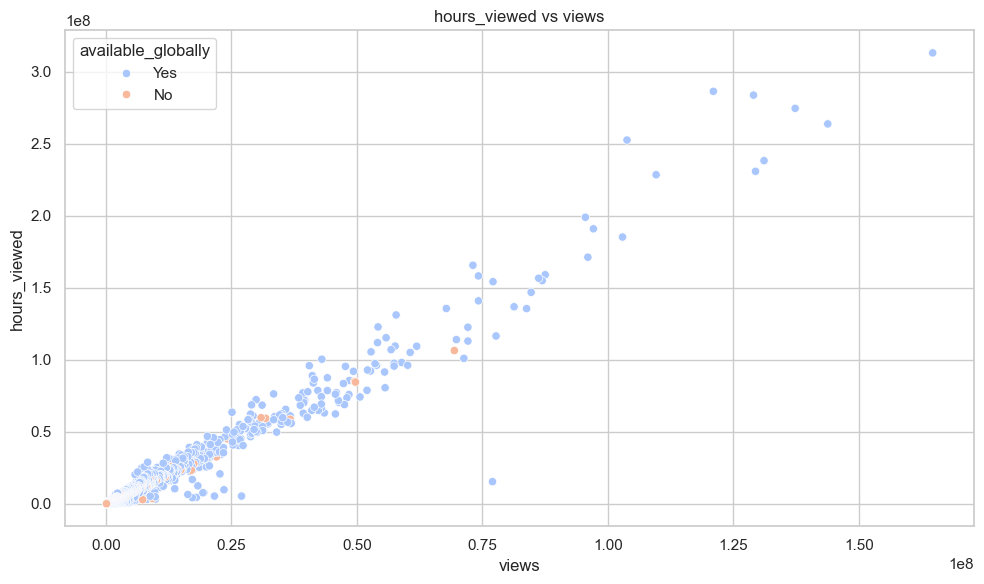

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day2_Pandas_EDA\pandas_utils.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="available_globally", ax=axes[0,1], palette="Set2")
c:\Users\Usuario\Desktop\100DaysofDataMastery\Day2_Pandas_EDA\pandas_utils.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="available_globally", y="hours_viewed", ax=axes[1,0], palette="Set3")


In [9]:
# Create outputs directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# Generate null values summary and save to file
def save_null_summary(data, output_path="outputs/null_values_summary.txt"):
    null_summary = data.isnull().sum()
    null_percentage = (data.isnull().sum() / len(data)) * 100
    null_report = pd.concat([null_summary, null_percentage], axis=1)
    null_report.columns = ['Null Count', 'Null Percentage']
    
    with open(output_path, 'w') as file:
        file.write("Null values summary report\n")
        file.write("="*40 + "\n")
        file.write(f"Total rows in dataset: {len(data)}\n")
        file.write("="*40 + "\n\n")
        file.write(null_report.to_string())
        file.write("\n\n" + "="*40 + "\n")
        file.write("Key Observations:\n")
        file.write(f"- Column with most nulls: {null_report['Null Count'].idxmax()} ({null_report['Null Count'].max()} nulls)\n")
        file.write(f"- Column with highest percentage: {null_report['Null Percentage'].idxmax()} ({null_report['Null Percentage'].max():.2f}%)\n")
        file.write("- Columns with no nulls: " + ", ".join(null_report[null_report['Null Count'] == 0].index.tolist()) + "\n")

# Generate and save null summary
save_null_summary(data_movies)

# Generate and save visualizations
plot_histogram(cleaned_data, "hours_viewed")
plot_bar(cleaned_data, "available_globally")
plot_boxplot(cleaned_data, "available_globally", "hours_viewed")
plot_scatter(cleaned_data, "views", "hours_viewed", "available_globally")

# Save combined plots
save_combined_plots(cleaned_data)

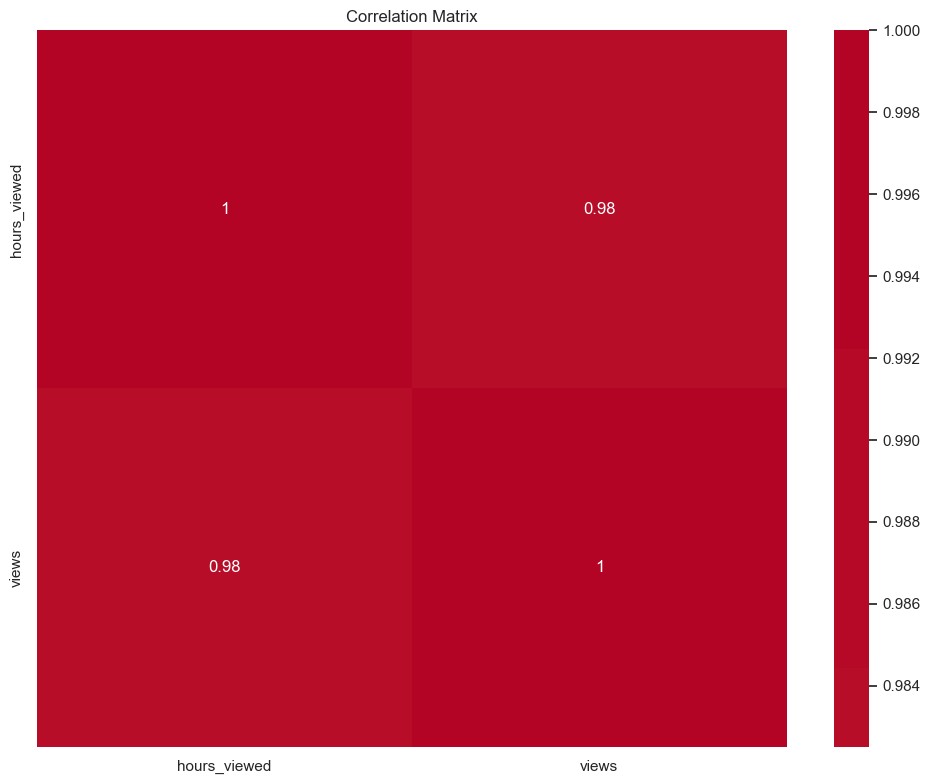

In [10]:
def plot_correlation_matrix(data):
    numeric_cols = data.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
    plt.close()

plot_correlation_matrix(cleaned_data)